In [1]:
import sys
sys.path.append('/home/mint/Dev/DiFaReli/difareli-faster/evaluations/')
import eval_dataloader
import numpy as np

mask_path = '/data/mint/DPM_Dataset/MultiPIE/MultiPIE_validset/face_segment/valid/anno/'
pred_path = '/data/mint/TPAMI_evaluations/MP/pred/Ours/ours_paired+allunet+nobg+nodpm+trainset_128/ema_150000/out/'
baseline_path = '/data/mint/TPAMI_evaluations/MP/pred/Ours/ours_128_Masked_Face_woclip+BgNoHead+shadow/ema_050000/out/'
gt_path = '/data/mint/DPM_Dataset/MultiPIE/MultiPIE_validset/mp_aligned_128/valid/'
face_part = 'faceseg_face_noears'
ds_mask = True

pred_loader, pred_dataset = eval_dataloader.eval_loader(
    gt_path = gt_path,
    pred_path = pred_path,
    mask_path = mask_path,
    face_part = face_part,
    n_eval = 200,
    batch_size = 200
)

baseline_loader, baseline_dataset = eval_dataloader.eval_loader(
    gt_path = gt_path,
    pred_path = baseline_path,
    mask_path = mask_path,
    face_part = face_part,
    n_eval = 200,
    batch_size = 1
)

print("[#] N = ", len(pred_dataset))


[#] N =  200


[#] MSE - baseline :  0.008322683924435564
[#] MSE - prediction :  0.017643309988194755
[#] RMSE - baseline :  0.09122874505568715
[#] RMSE - prediction :  0.09122874505568715
[#] RMSE baseline to pixel error : 0.09122874505568715 = 23.2633
[#] RMSE prediction to pixel error : 0.13282812197797106 = 33.8712
12 12


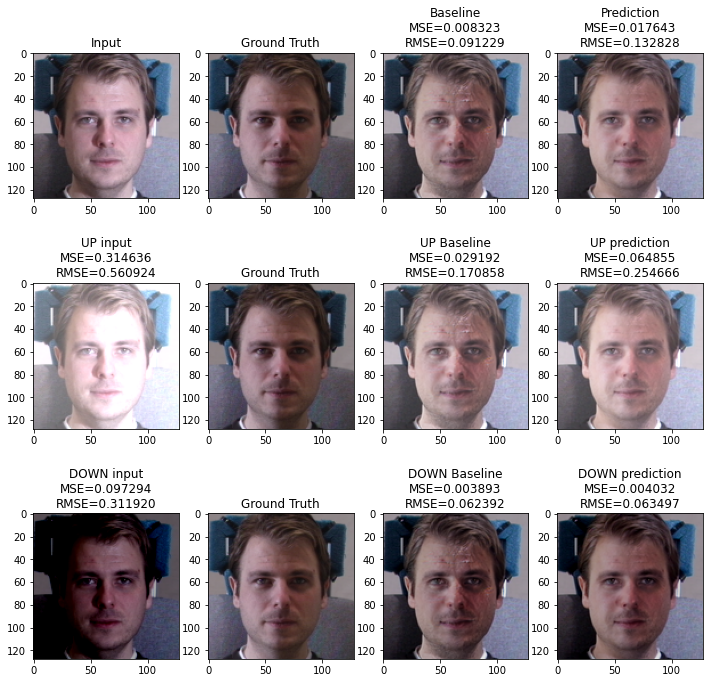

In [8]:
from PIL import Image
import blobfile as bf
import matplotlib.pyplot as plt
import numpy as np
import PIL, torchvision
import torch as th

def mse_rmse(img1, img2, mask=None):
    err = ((img1-img2)*mask)**2
    mse = np.sum(err) / (np.sum(mask))
    return mse, np.sqrt(mse)

# k_in = list(out_dict.keys())[2]
# k_pred = list(out_dict[k_in].keys())[0]

idx = 22
# input_img = load_image(out_dict[k_in][k_pred]['input'])
input_img = pred_dataset[idx]['input'].transpose(1, 2, 0)
gt_img = pred_dataset[idx]['gt'].transpose(1, 2, 0)
pred_img = pred_dataset[idx]['pred'].transpose(1, 2, 0)
baseline_img = baseline_dataset[idx+2]['pred'].transpose(1, 2, 0)
mask_img = pred_dataset[idx]['mask']
resizer = torchvision.transforms.Resize(size=(128, 128), interpolation=PIL.Image.NEAREST)
mask_img = resizer(th.tensor(mask_img).float())
mask_img = mask_img.numpy().transpose(1, 2, 0)

mse_baseline, rmse_baseline = mse_rmse(np.array(gt_img), np.array(baseline_img), mask_img)
mse_pred, rmse_pred = mse_rmse(np.array(gt_img), np.array(pred_img), mask_img)
px_err_baseline = rmse_baseline
px_err_pred = rmse_pred
print("[#] MSE - baseline : ", mse_baseline)
print("[#] MSE - prediction : ", mse_pred)
print("[#] RMSE - baseline : ", rmse_baseline)
print("[#] RMSE - prediction : ", rmse_baseline)
print(f"[#] RMSE baseline to pixel error : {px_err_baseline} = {px_err_baseline*255.0:.4f}")
print(f"[#] RMSE prediction to pixel error : {px_err_pred} = {px_err_pred*255.0:.4f}")

scale_up_pred_img = np.clip(((np.array(pred_img)) + (px_err_pred)) * 255.0, 0, 255).astype(np.uint8)
scale_down_pred_img = np.clip(((np.array(pred_img)) - (px_err_pred)) * 255.0, 0, 255).astype(np.uint8)
mse_scale_up_pred, rmse_scale_up_pred = mse_rmse(np.array(gt_img), scale_up_pred_img/255.0, mask_img)
px_err_scale_up_pred = rmse_scale_up_pred
mse_scale_down_pred, rmse_scale_down_pred = mse_rmse(np.array(gt_img), scale_down_pred_img/255.0, mask_img)
px_err_scale_down_pred = rmse_scale_down_pred
# print("[#] MSE - scaled prediction : ", mse_scale_up_pred)
# print("[#] RMSE - scaled prediction : ", rmse_scale_up_pred)
# print(f"[#] RMSE scaled prediction to pixel error : {px_err_scale_up_pred} = {px_err_scale_up_pred/255.0:.4f}")

scale_up_baseline_img = np.clip(((np.array(baseline_img)) + (px_err_baseline)) * 255.0, 0, 255).astype(np.uint8)
scale_down_baseline_img = np.clip(((np.array(baseline_img)) - (px_err_baseline)) * 255.0, 0, 255).astype(np.uint8)
mse_scale_up_baseline, rmse_scale_up_baseline = mse_rmse(np.array(gt_img), scale_up_baseline_img/255.0, mask_img)
px_err_scale_baseline = rmse_scale_up_baseline
mse_scale_down_baseline, rmse_scale_down_baseline = mse_rmse(np.array(gt_img), scale_down_baseline_img/255.0, mask_img)
px_err_scale_baseline = rmse_scale_down_baseline
# print("[#] MSE - scaled baseline : ", mse_scale_up_baseline)
# print("[#] RMSE - scaled baseline : ", rmse_scale_up_baseline)
# print(f"[#] RMSE scaled baseline to pixel error : {px_err_scale_baseline} = {px_err_scale_baseline/255.0:.4f}")

mse_input, rmse_input = mse_rmse(np.array(gt_img), np.array(input_img), mask_img)
px_err_input = rmse_input
scale_up_input_img = np.clip(((np.array(input_img)) + (px_err_input)) * 255.0, 0, 255).astype(np.uint8)
scale_down_input_img = np.clip(((np.array(input_img)) - (px_err_input)) * 255.0, 0, 255).astype(np.uint8)
mse_scale_up_input, rmse_scale_up_input = mse_rmse(np.array(gt_img), scale_up_input_img/255.0, mask_img)
mse_scale_down_input, rmse_scale_down_input = mse_rmse(np.array(gt_img), scale_down_input_img/255.0, mask_img)
# print("[#] MSE - input : ", mse_input)
# print("[#] RMSE - input : ", rmse_input)
# print(f"[#] RMSE input to pixel error : {px_err_input} = {px_err_input/255.0:.4f}")


# Plot all images

img = [input_img, gt_img, gt_img, gt_img, baseline_img, scale_up_baseline_img, scale_down_baseline_img, pred_img, scale_up_pred_img, scale_down_pred_img, scale_up_input_img, scale_down_input_img]
label = ['Input', 
         'Ground Truth', 
         'Ground Truth', 
         'Ground Truth', 
         f'Baseline\nMSE={mse_baseline:4f}\nRMSE={rmse_baseline:4f}', 
         f'UP Baseline\nMSE={mse_scale_up_baseline:4f}\nRMSE={rmse_scale_up_baseline:4f}', 
         f'DOWN Baseline\nMSE={mse_scale_down_baseline:4f}\nRMSE={rmse_scale_down_baseline:4f}',
         f'Prediction\nMSE={mse_pred:4f}\nRMSE={rmse_pred:4f}',
         f'UP prediction\nMSE={mse_scale_up_pred:4f}\nRMSE={rmse_scale_up_pred:4f}',
         f'DOWN prediction\nMSE={mse_scale_down_pred:4f}\nRMSE={rmse_scale_down_pred:4f}',
         f'UP input\nMSE={mse_scale_up_input:4f}\nRMSE={rmse_scale_up_input:4f}',
         f'DOWN input\nMSE={mse_scale_down_input:4f}\nRMSE={rmse_scale_down_input:4f}']

print(len(img), len(label))
assert len(img) == len(label)
fig, ax = plt.subplots(3, 4, figsize=(12, 12))
pos = [[0, 0], [0, 1], [1, 1], [2, 1], [0, 2], [1, 2], [2, 2], [0, 3], [1, 3], [2, 3], [1, 0], [2, 0]]
       
for i in range(len(img)):
    ax[tuple(pos[i])].imshow(img[i])
    ax[tuple(pos[i])].set_title(label[i])
plt.show()

